In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
trainData=pd.read_csv('Week7_train.csv')
trainData
trainData.shape

(42000, 785)

In [3]:
train_sampleData=trainData.sample(frac=0.1)
train_sampleData.shape
# train_sampleData.head(5)

(4200, 785)

In [4]:
print(train_sampleData['label'].nunique())

10


Text(0.5, 1.0, 'each class label')

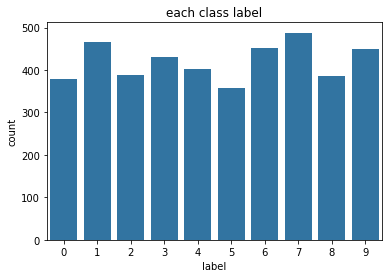

In [5]:
sns.countplot(x='label',data=train_sampleData)
plt.title("each class label")

In [6]:
x=train_sampleData.drop(columns='label')
print(x.shape)
y=train_sampleData['label']
print(y.shape)


(4200, 784)
(4200,)


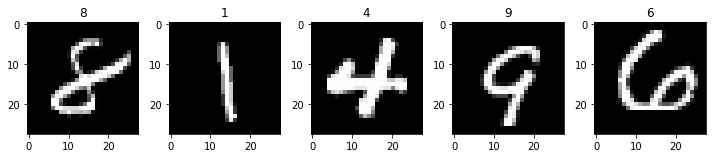

In [7]:
plt.figure(figsize=(10,5))

for i in range(5):
    img=x.iloc[i].values.reshape(28,28)
    label=y.iloc[i]
    plt.subplot(1,5,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(label)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape

(3150, 784)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(metric='euclidean',n_neighbors=315)
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=315)

In [10]:
yPred=model.predict(x_test)


In [11]:
from sklearn.metrics import classification_report,accuracy_score
print("class : ",classification_report(y_test,yPred))
print("accuracy : ",accuracy_score(y_test,yPred))

class :                precision    recall  f1-score   support

           0       0.97      0.88      0.92        96
           1       0.38      1.00      0.55       109
           2       0.96      0.46      0.62       102
           3       0.81      0.67      0.73       108
           4       0.81      0.56      0.66       109
           5       0.90      0.35      0.50        80
           6       0.81      0.77      0.79       113
           7       0.80      0.87      0.83       112
           8       0.82      0.41      0.55       111
           9       0.60      0.81      0.69       110

    accuracy                           0.69      1050
   macro avg       0.79      0.68      0.69      1050
weighted avg       0.78      0.69      0.69      1050

accuracy :  0.6857142857142857


In [12]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,yPred))

[[ 84   3   0   0   0   1   4   0   1   3]
 [  0 109   0   0   0   0   0   0   0   0]
 [  0  33  47   2   1   0   9   6   4   0]
 [  0  25   1  72   1   0   1   1   4   3]
 [  0  13   0   0  61   0   2   2   0  31]
 [  1  27   0  10   3  28   3   0   0   8]
 [  2  19   1   0   2   1  87   0   1   0]
 [  0  11   0   0   1   0   1  97   0   2]
 [  0  40   0   5   4   1   1   2  46  12]
 [  0   6   0   0   2   0   0  13   0  89]]


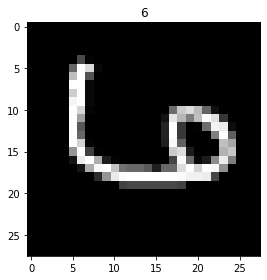

In [13]:
# plt.figure(figsize=(10,5))


img=x_test.iloc[100].values.reshape(28,28)
label=y_test.iloc[100]
plt.imshow(img,cmap='gray')
plt.title(label)
plt.tight_layout()
plt.show()